<h1 align="center">Classification of Arrhythmia</h1>

Dataset used in this project is available on the UCI machine learning Repository. 

* It can be found at the following address: https://archive.ics.uci.edu/ml/datasets/Arrhythmia. 


* It consists of 452 different examples spread over 16 classes. Of the 452 examples, 245 are of "normal" people. We also have 12 different types of arrhythmias. Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".


* We have 279 features, which include age, sex, weight, height of patients and related information from the electrocardiogram. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.


* Our goal is to predict if a person is suffering from arrhythmia and if class, classify it in to one of 12 available groups.

### Importing Essential Libraries

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

In [7]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\RAKESH S\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Data Reading


Starting with reading the data file and creating a dataframe for putting the output of all the models that we will be running. The purpose of doing this is it will be easy for us to compare the models.

In [10]:
df=pd.read_csv("D:/vs/ML Projects/Classification of Arrhythmia/Data/arrhythmia.csv",header=None)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [12]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


**Basic Description of dataframe**

In [13]:
#Dimension of dataset.

df.shape

(452, 280)

In [14]:
#concise summary of the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [15]:
#descriptive statistics of dataframe.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


# 1. Data preprocessing

### Handling Missing Values

<br>
While going through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form 
of '?'. The approach which we will following is, first replacing '?' with numpy NAN and then imputing the mean using Simple Imputer.

**Checking for null values in dataset**

In [16]:
#Counting total Number of null values

pd.isnull(df).sum().sum()

0

In [17]:
#Replacing ? with np.nan value-

df = df.replace('?', np.NaN)

In [18]:
#final counting total number of null values in dataset

nu=pd.isnull(df).sum().sum()
nu

408

**Visualizing  the distribution of our missing data:**

Text(0, 0.5, 'Total number of null value in each column')

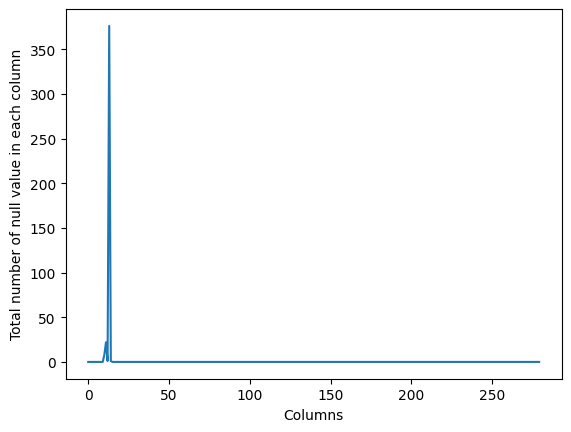

In [19]:
pd.isnull(df).sum().plot()
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Text(0, 0.5, 'Total number of null value in each column')

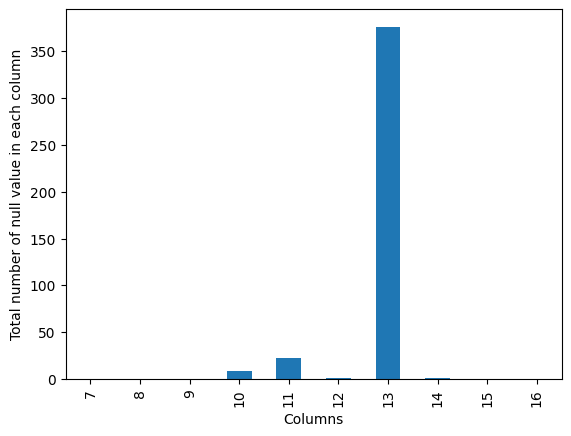

In [20]:
#Zooming in

pd.isnull(df).sum()[7:17].plot(kind="bar")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in each column')

Column 13 contains more than 350 missing values out of total 452 instances. so we will drop column 13. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.

In [21]:
#Dropping the column 13

df.drop(columns = 13, inplace=True)

**Using the mean strategy for imputation**

In [22]:
# make copy to avoid changing original data (when Imputing)

new_df = df.copy()

In [23]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [24]:
# Imputation
# my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

In [25]:
# imputed dataframe

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [26]:
# DataSet with Zero null Values.

pd.isnull(new_df).sum().sum()

0

**Generating final dataset**

In [27]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [28]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [29]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [30]:
final_df.shape

(452, 278)

# 2. Exploratory Data Analysis (EDA)

Analyzing data sets to summarize their main characteristics.

Making List of all the type of Arrythmia corresponsing to their class label

In [31]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class:
we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [32]:
t=new_df.sort_values(by=["class"])

In [33]:
# Counting the number of instances for each class

la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

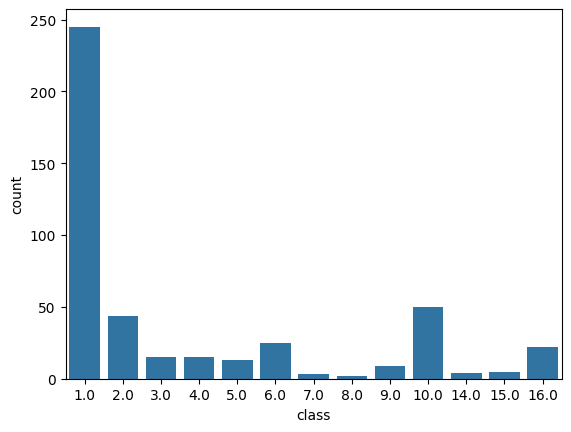

In [34]:
sns.countplot(x ='class',data =new_df) 
plt.show() 

Lets Count the total number of instances we have for each class.

In [35]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)


[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


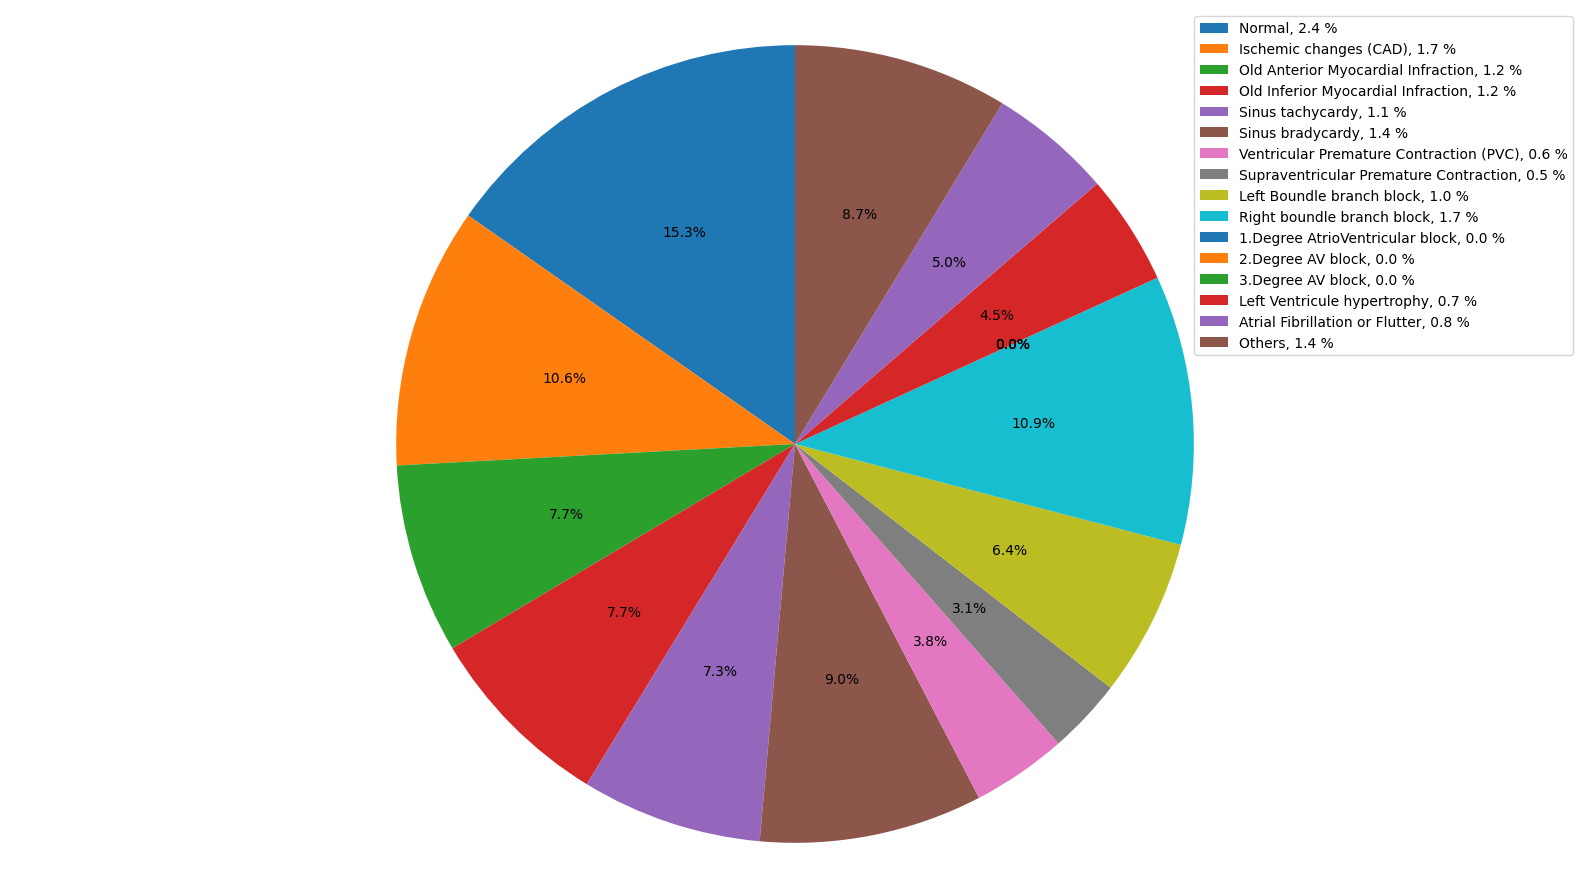

In [36]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()


We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.


### Handling Outliers & Data Visualization

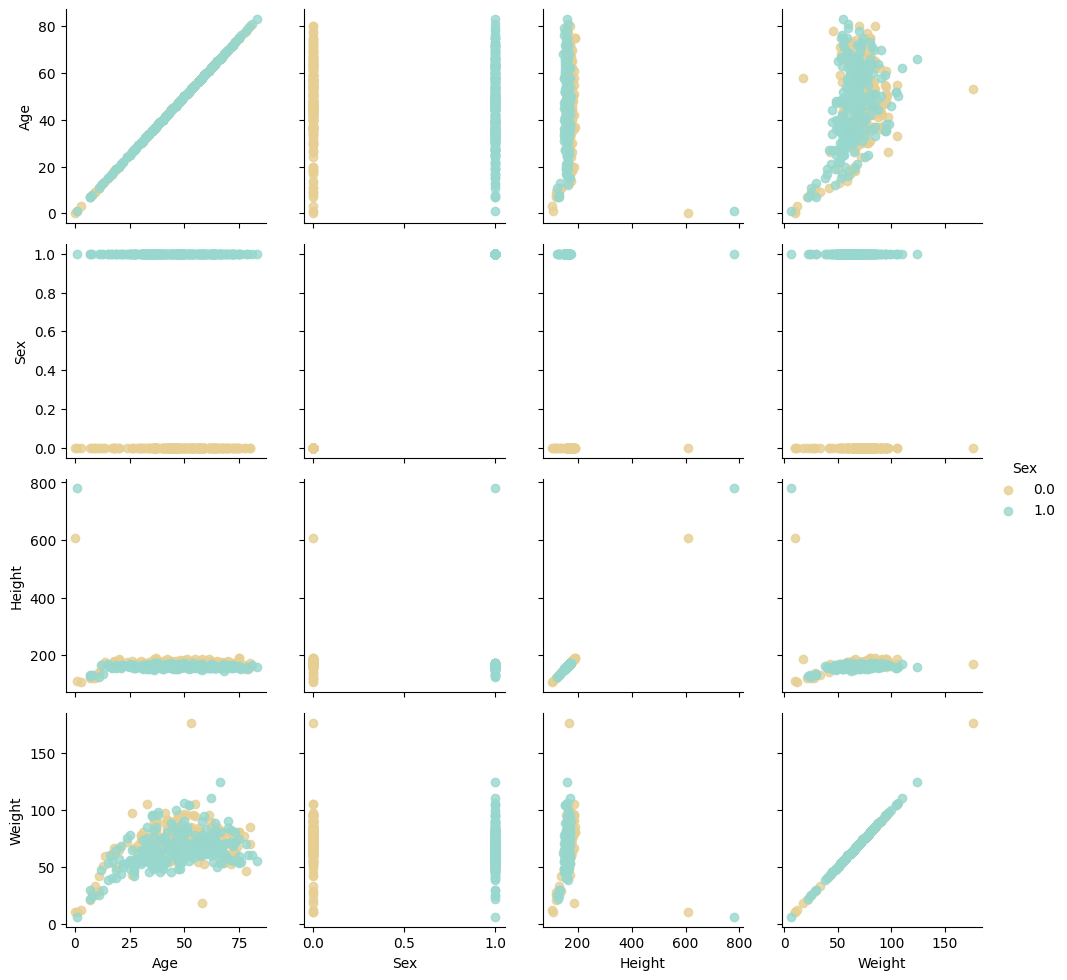

In [37]:
#looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [38]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [39]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [40]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

**176 kgs** is a possible weight. so we'll keep them in the dataframe.

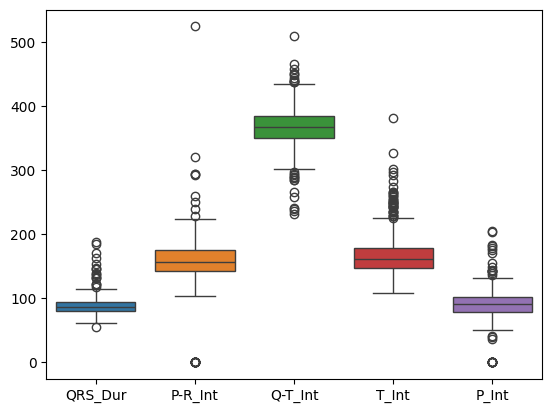

In [41]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration. 

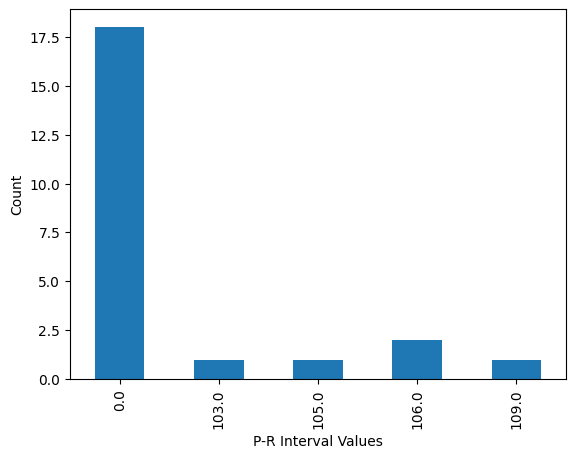

In [42]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

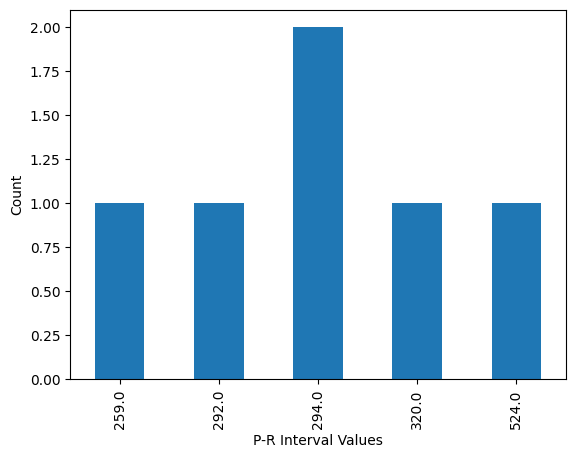

In [43]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

PR Interval data is including outliers 0(x18). we'll keep them

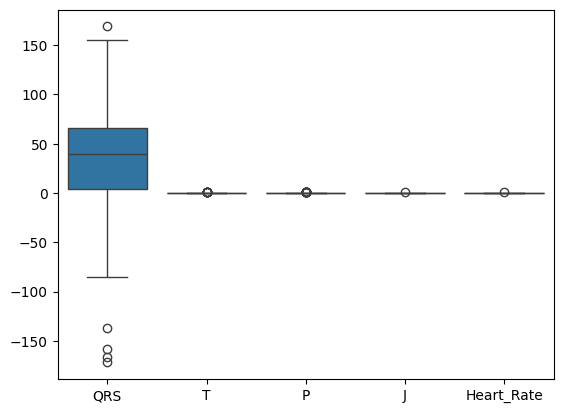

In [44]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]]);

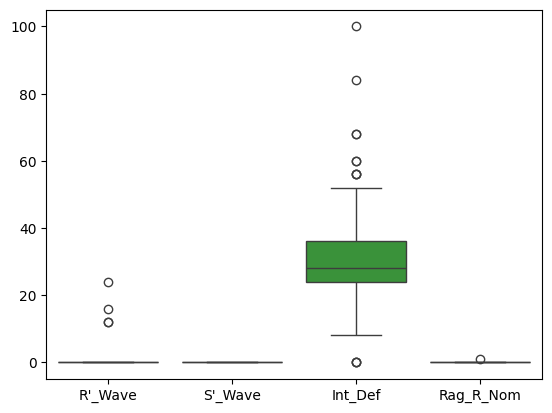

In [45]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

*S*'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [46]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [47]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

In [48]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

In [49]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

In [50]:
final_df["V501"].value_counts().sort_index(ascending=False)

V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

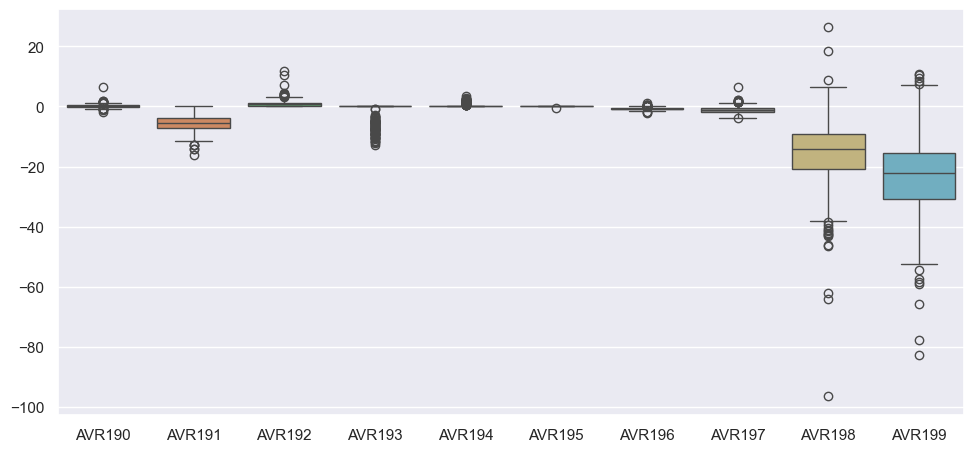

In [51]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

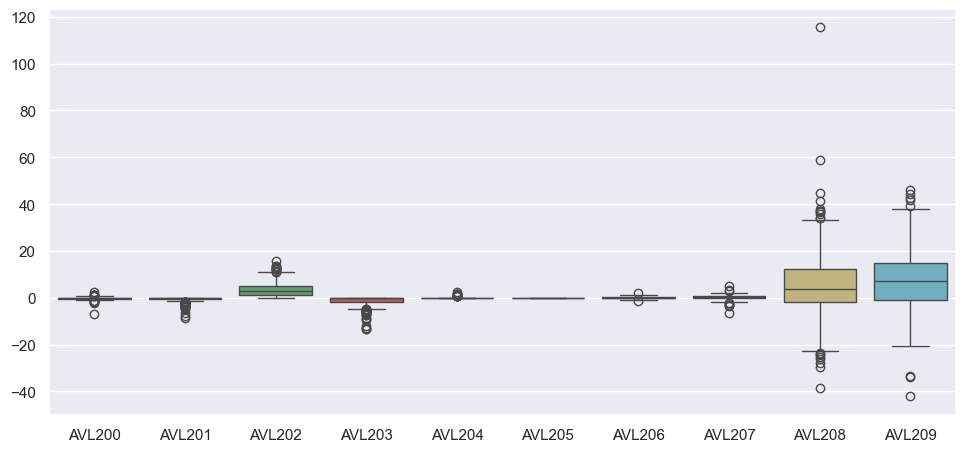

In [52]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

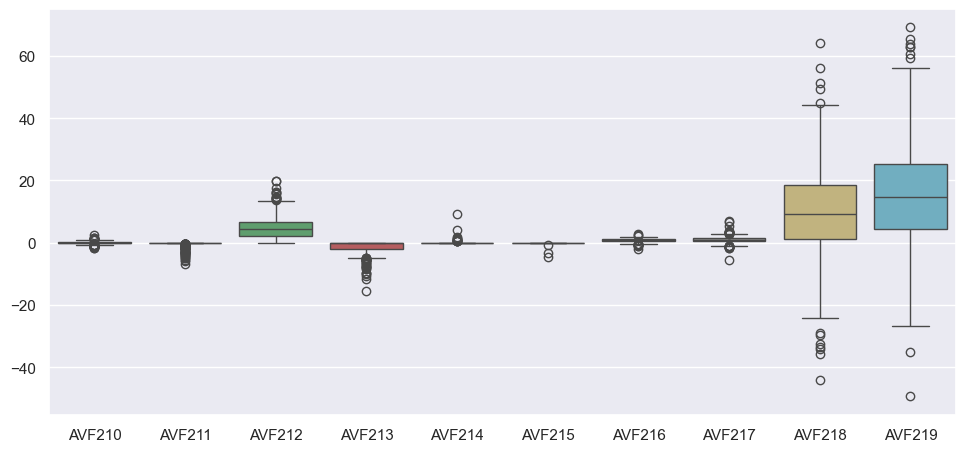

In [53]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

In [ ]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling and Splitting dataset
<br />
We will be using 80% of our dataset for training purpose and 20% for testing purpose.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
import warnings
warnings.filterwarnings('ignore')

## Evaluation strategy


As the dependent variable is a categorical variable we will be using classification models. The best evaluation strategy for classification models is comparing the precision and recall. Thinking about the classification evaluation metrics, the importance of our models' precitions (we can't accept a result having the probability of saying to a healthy person that you have Cardiac Arrhythmia (FN)).

We definitely will focus on Sensitivity (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition).

In [57]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix

# **3. Modeling**

In [58]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

## KNN Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [62]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

new_row = pd.DataFrame([{'Model': 'KNN Classifier', 'Train Accuracy': knn_train_accuracy, 'Test Accuracy': knn_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)

## Logistic regression

In [63]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga',random_state = 0) 
lgclassifier.fit(X_train, y_train) 
y_pred = lgclassifier.predict(X_test)

In [65]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))
new_row = pd.DataFrame([{'Model': 'Logestic Regression', 'Train Accuracy': lg_train_accuracy, 'Test Accuracy': lg_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)

## Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [68]:
dt_train_accuracy = accuracy_score(y_train, y_pred_train)
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

new_row = pd.DataFrame([{
    'Model': 'Decision Tree Classifier',
    'Train Accuracy': dt_train_accuracy,
    'Test Accuracy': dt_test_accuracy
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319


## Linear SVM

In [69]:
from sklearn.svm import LinearSVC 
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train) 
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [71]:
lsvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

new_row = pd.DataFrame([{
    'Model': 'Linear SVC',
    'Train Accuracy': lsvc_train_accuracy_score,
    'Test Accuracy': lsvc_test_accuracy_score
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220


## Kernelized SVM

In [72]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [74]:
ksvc_train_accuracy_score = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy_score = accuracy_score(y_test, y_pred_test)

new_row = pd.DataFrame([{
    'Model': 'Kernelized SVC',
    'Train Accuracy': ksvc_train_accuracy_score,
    'Test Accuracy': ksvc_test_accuracy_score
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209


## Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [77]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy_score = accuracy_score(y_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_test, y_pred_test)

new_row = pd.DataFrame([{
    'Model': 'Random Forest Classifier',
    'Train Accuracy': rf_train_accuracy_score,
    'Test Accuracy': rf_test_accuracy_score
}])

result = pd.concat([result, new_row], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.780220
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.780220
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242


We found that the best model in term of recall is kernelized SVM with accuracy percentage of **79.12** over other models. We also found that Logestic Regression has better accuracy score.

# Sampling and PCA


Since our dataset is imbalance with number of instances of class 7 and class 8 are 2,3 respectively, whereas for class 1, having examples 245. So we will try to solve class imbalancy by randomly resample the training dataset using Oversampling.

We will be using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.

## Random Over Sampling

In [80]:
#performing over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(final_df, target)

X_resampled.shape

(3185, 278)

In [79]:
pip install imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\RAKESH S\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
#finding frequency of each class

import collections
counter = collections.Counter(y_resampled)
counter

Counter({8.0: 245,
         6.0: 245,
         10.0: 245,
         1.0: 245,
         7.0: 245,
         14.0: 245,
         3.0: 245,
         16.0: 245,
         2.0: 245,
         4.0: 245,
         5.0: 245,
         9.0: 245,
         15.0: 245})

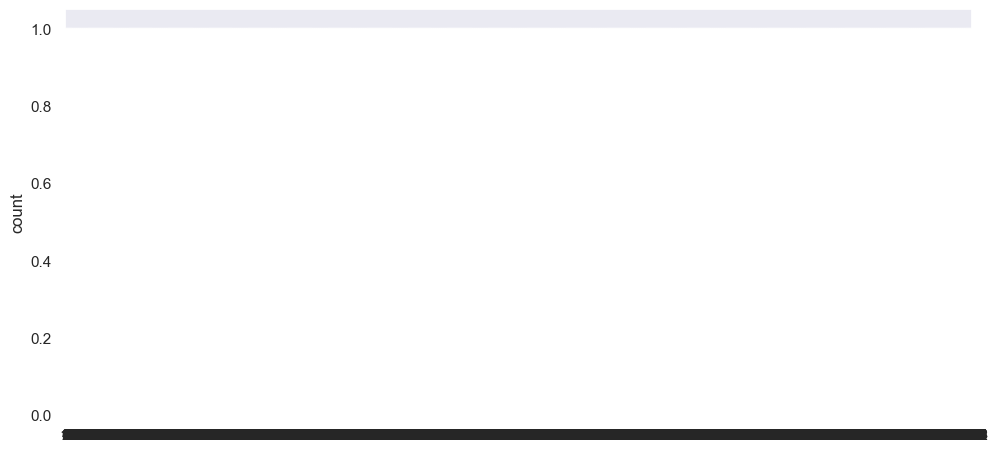

In [82]:
sns.countplot(y_resampled) 
plt.show() 

In [83]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled , test_size=0.2, random_state=1)

In [84]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

## PCA

In [85]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train1)

pca.n_components_

99

In [86]:
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

## KNN with PCA

In [87]:
classifier = KNeighborsClassifier()
classifier.fit(X_train1, y_train1)
Y_pred = classifier.predict(X_test1)

In [89]:
knnp_train_accuracy = accuracy_score(y_train1, classifier.predict(X_train1))
knnp_test_accuracy = accuracy_score(y_test1, Y_pred)

# Create a new Series for the current model's result
new_result = pd.Series({'Model': 'Knn with PCA', 'Train Accuracy': knnp_train_accuracy, 'Test Accuracy': knnp_test_accuracy})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485


## Logistic Regression with PCA

In [90]:
from sklearn.linear_model import LogisticRegression
lgpclassifier = LogisticRegression(C=10,random_state = 0) 
lgpclassifier.fit(X_train1, y_train1) 
y_pred_train1 = lgpclassifier.predict(X_train1)
y_pred_test1 = lgpclassifier.predict(X_test1)

In [92]:
lgp_train_accuracy = accuracy_score(y_train1, y_pred_train1)
lgp_test_accuracy = accuracy_score(y_test1, y_pred_test1)

# Create a new Series for the Logistic Regression PCA model's results
new_result = pd.Series({'Model': 'Logistic Regression PCA', 'Train Accuracy': lgp_train_accuracy, 'Test Accuracy': lgp_test_accuracy})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485
7,Logistic Regression PCA,0.999608,0.970173


## Decision Tree Classifier with PCA

In [93]:
from sklearn.tree import DecisionTreeClassifier 
dtpclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtpclassifier.fit(X_train1, y_train1) 
y_pred_test = dtpclassifier.predict(X_test1)
y_pred_train = dtpclassifier.predict(X_train1)

In [94]:
dtp_train_recall_score = recall_score(y_train1, y_pred_train, average='weighted')
dtp_test_recall_score = recall_score(y_test1, y_pred_test, average='weighted')

dtp_train_accuracy_score = accuracy_score(y_train1, y_pred_train)
dtp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)

In [96]:
# Create a new Series for the Decision Tree with PCA model's results
new_result = pd.Series({'Model': 'Decision Tree with PCA', 'Train Accuracy': dtp_train_accuracy_score, 'Test Accuracy': dtp_test_accuracy_score})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485
7,Logistic Regression PCA,0.999608,0.970173
8,Decision Tree with PCA,1.0,0.965463


## Linear SVM with PCA

In [97]:
from sklearn.svm import SVC 
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(X_train1, y_train1) 
y_pred = classifier.predict(X_test1)

In [99]:
# Calculate accuracy for Linear SVM with PCA
lsvcp_train_accuracy = accuracy_score(y_train1, classifier.predict(X_train1))
lsvcp_test_accuracy = accuracy_score(y_test1, y_pred)

# Create a new Series for the Linear SVM with PCA model's results
new_result = pd.Series({'Model': 'Linear SVM with PCA', 'Train Accuracy': lsvcp_train_accuracy, 'Test Accuracy': lsvcp_test_accuracy})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485
7,Logistic Regression PCA,0.999608,0.970173
8,Decision Tree with PCA,1.0,0.965463
9,Linear SVM with PCA,0.999608,0.971743


## Kernelized SVM with PCA

In [100]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf',C=1,gamma=0.1)
KSVC_clf.fit(X_train1, y_train1)
y_pred_train1 = KSVC_clf.predict(X_train1)
y_pred_test1 = KSVC_clf.predict(X_test1)

In [102]:
# Calculate accuracy for Kernelized SVM with PCA
ksvcp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
ksvcp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

# Create a new Series for the Kernelized SVM with PCA model's results
new_result = pd.Series({'Model': 'Kernelized SVM with PCA', 'Train Accuracy': ksvcp_train_accuracy_score, 'Test Accuracy': ksvcp_test_accuracy_score})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485
7,Logistic Regression PCA,0.999608,0.970173
8,Decision Tree with PCA,1.0,0.965463
9,Linear SVM with PCA,0.999608,0.971743


## Random Forest with PCA

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train1, y_train1)

RandomForestClassifier()

In [104]:
y_pred_train1 = rfp_clf.predict(X_train1)
y_pred_test1 = rfp_clf.predict(X_test1)
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

In [106]:
# Calculate accuracy for Random Forest with PCA
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

# Create a new Series for the Random Forest with PCA model's results
new_result = pd.Series({'Model': 'Random Forest with PCA', 'Train Accuracy': rfp_train_accuracy_score, 'Test Accuracy': rfp_test_accuracy_score})

# Concatenate it to the result DataFrame
result = pd.concat([result, new_result.to_frame().T], ignore_index=True)
result


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.648199,0.648352
1,Logestic Regression,0.939058,0.78022
2,Decision Tree Classifier,0.789474,0.681319
3,Linear SVC,0.880886,0.78022
4,Kernelized SVC,0.850416,0.791209
5,Random Forest Classifier,0.878116,0.758242
6,Knn with PCA,0.968603,0.943485
7,Logistic Regression PCA,0.999608,0.970173
8,Decision Tree with PCA,1.0,0.965463
9,Linear SVM with PCA,0.999608,0.971743


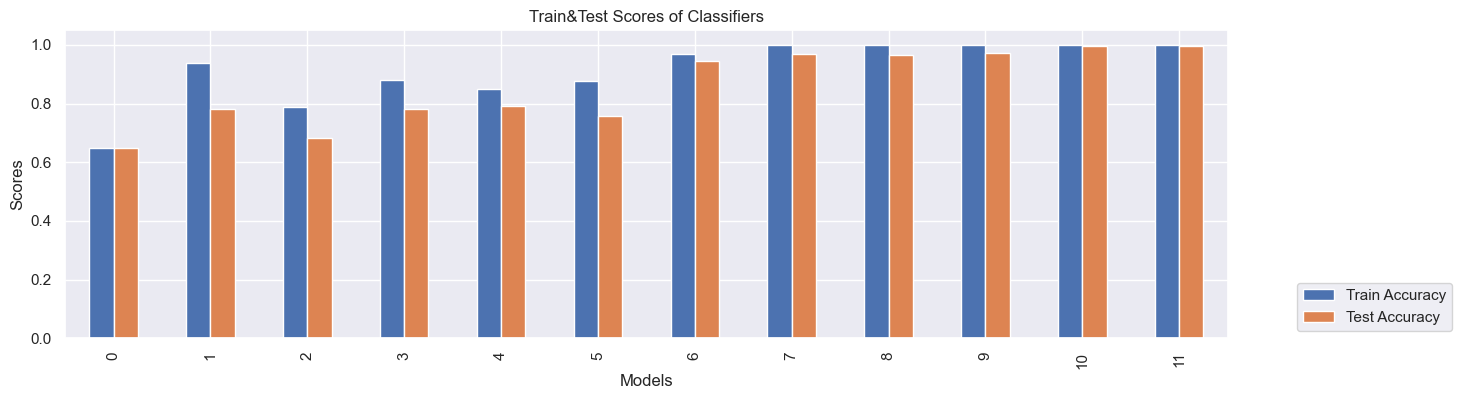

In [107]:
result.plot(kind="bar",figsize=(15,4))
plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

# Result

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables. 

The Best model recall score is Kernalized SVM with PCA having accuracy of **99.52%.**